### `SVM Class`

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [8]:
class SimpleSVM:
    def __init__(self, lr=0.001, lambda_p=0.01, iter_num=1000):
        # define main parameters
        self.lr = lr
        self.lambda_p = lambda_p
        self.iter_num = iter_num
        
        # define weights and bias
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        # get number of samples and number of features
        n_samples, n_features = X.shape
        # replace values lower than or equals zero to -1, otherwise 1
        y_sign = np.where(y <= 0, -1, 1)
        # initialize model's parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # start leaning the model
        for _ in range(self.iter_num):
            for idx, sample in enumerate(X):
                # check if y * (W.X - b) >= 1 
                check = y_sign[idx] * (np.dot(self.w, sample) - self.b) >= 1
                # update model's parameter
                if check:
                    self.w -= (2 * self.lambda_p * self.w) * self.lr
                else:
                    self.w -= ((2 * self.lambda_p * self.w) - np.dot(y_sign[idx], sample)) * self.lr
                    self.b -= y[idx] * self.lr
                
    def predict(self, X):
        # simply substitude in the equation (W.X - b):
        #  1) if it's positive == > assign it to class 1
        #  1) if it's negative == > assign it to class 0
        
        out = np.dot(self.w, X) - self.b
        # we can use np sign function to get the sign of number easily
        return np.sign(out)

### `Visualization class`

In [16]:
def visualize_svm(X, y, clf):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

In [13]:
# create dataset
X, y = make_blobs(
    n_samples=300, 
    n_features=2, 
    centers=2, 
    cluster_std=1.5
)

y = np.where(y == 0, -1, 1)

In [14]:
# train a model
clf = SimpleSVM()
clf.fit(X, y)

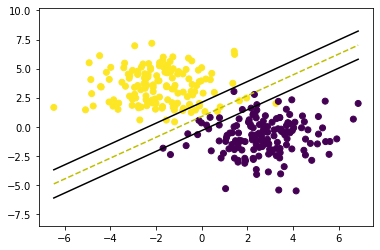

In [17]:
# visualize results
visualize_svm(X, y, clf)